In [6]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
# Importing data
path = ""
data_train = pd.read_csv(r"C:\Users\Shaurya\Desktop\ML project\train.csv")
data_train.head()
data_train.shape
# (14999, 9)

(14999, 9)

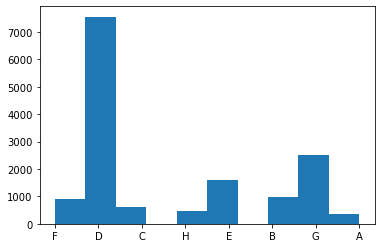

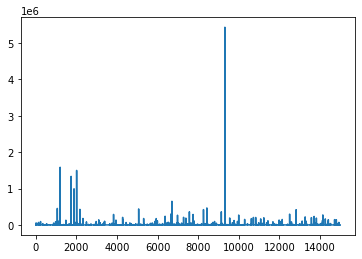

C:\Users\Shaurya\AppData\Local\Temp/ipykernel_7756/628555028.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


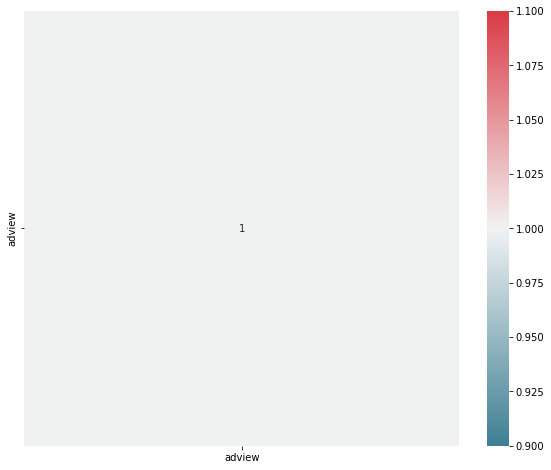

In [7]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [8]:
data_train.describe
data_train.isnull()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False


In [9]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,6
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,4
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,3
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,8
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,4


In [11]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp
train=pd.read_csv(r"C:\Users\Shaurya\Desktop\ML project\train.csv")
mp = pd.read_csv(r"C:\Users\Shaurya\Desktop\ML project\train.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,1090,457,6
1,2741,2,1707,56,2,6,64,570,4
2,8138,1,2023,25,0,2,122,136,3
3,9004,6,620860,777,161,153,2088,262,8
4,122,1,666,1,0,0,2233,31,4


In [12]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.15357571865666558

In [13]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3493.3179717888065
Mean Squared Error: 838355049.0604035
Root Mean Squared Error: 28954.361485973117


C:\Users\Shaurya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error: 3493.3179717888065
Mean Squared Error: 838355049.0604035
Root Mean Squared Error: 28954.361485973117


In [14]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 5515.108265027322
Mean Squared Error: 4595220186.703211
Root Mean Squared Error: 67788.05342169969


C:\Users\Shaurya\AppData\Local\Temp/ipykernel_7756/2265011498.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 3371.498503086352
Mean Squared Error: 876016689.7564771
Root Mean Squared Error: 29597.579119861766


In [15]:
# Artificial Neural Network
import keras
import tensorflow as tf
from keras.layers import Dense
ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=X_train.shape[1:]),
                                Dense(6,activation="relu"),
                                Dense(1)
                                ])

optimizer=tf.keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 0s 564us/step - loss: 767405760.0000 - mean_squared_error: 767405760.0000
Epoch 2/100
366/366 [==============================] - 0s 574us/step - loss: 767394304.0000 - mean_squared_error: 767394304.0000
Epoch 3/100
366/366 [==============================] - 0s 580us/step - loss: 767368064.0000 - mean_squared_error: 767368064.0000
Epoch 4/100
366/366 [==============================] - 0s 576us/step - loss: 767327168.0000 - mean_squared_error: 767327168.0000
Epoch 5/100
366/366 [==============================] - 0s 606us/step - loss: 767271296.0000 - mean_squared_error: 767271296.0000
Epoch 6/100
366/366 [==============================] - 0s 593us/step - loss: 767198144.0000 - mean_squared_error: 767198144.0000
Epoch 7/100
366/366 [==============================] - 0s 593us/step - loss: 767108736.0000 - mean_squared_error: 767108736.0000
Epoch 8/100
366/366 [==============================] - 0s 579us/step - loss: 767002880.0000 - mea

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

#k nearest neighbour
kn = KNeighborsClassifier(n_neighbors=8)

kn.fit(X_train, y_train)
kn_pred = kn.predict(X_test)
kn_acc = accuracy_score(y_test, kn_pred)
print('Accuracy of KNeighbors is: {:.2f}%'.format(kn_acc*100))

#randomforestClassifier 
rf = RandomForestClassifier(random_state=0)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print('Accuracy of Random Forest is: {:.2f}%'.format(rf_acc*100))

#Decision tree-classifier
dt = DecisionTreeClassifier(random_state=0)

dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print('Accuracy of Decision Tree is: {:.2f}%'.format(dt_acc*100))

#logistic regression
lr = LogisticRegression(random_state=0)

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print('Accuracy of Logistic Regression is: {:.2f}%'.format(lr_acc*100))

C:\Users\Shaurya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of KNeighbors is: 38.66%


C:\Users\Shaurya\AppData\Local\Temp/ipykernel_7756/2315130723.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Accuracy of Random Forest is: 38.66%
Accuracy of Decision Tree is: 21.65%


C:\Users\Shaurya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of Logistic Regression is: 41.91%


C:\Users\Shaurya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
#Saving best model
import pickle
with open('lr.pkl', 'wb') as files:
    pickle.dump(lr, files)


#Saving Scikitlearn models
tf.keras.models.save_model(ann,'ann_youtubeadview.h5')

In [21]:
# load saved model
with open('lr.pkl' , 'rb') as f:
    lr= pickle.load(f)

In [22]:
data_test = pd.read_csv(r"C:\Users\Shaurya\Desktop\ML project\test.csv")
data_test.head()
data_test.shape

(8764, 8)

In [23]:
data_test.describe
data_test.isnull()

,vidid,views,likes,dislikes,comment,published,duration,category
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
8759,False,False,False,False,False,False,False,False
8760,False,False,False,False,False,False,False,False
8761,False,False,False,False,False,False,False,False
8762,False,False,False,False,False,False,False,False


In [24]:
# Removing character "F" present in data
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']
data_test.head()
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [26]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])

column_vidid=data_test['vidid']
# Encoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp
test=pd.read_csv(r"C:\Users\Shaurya\Desktop\ML project\test.csv")
mp = pd.read_csv(r"C:\Users\Shaurya\Desktop\ML project\test.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [40]:
pd.DataFrame(data_train.columns).to_csv("test.csv", index = None)

In [45]:
data_test

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2
...,...,...,...,...,...,...,...
8759,111205,471,14,101,231,194,3
8760,1074457,1024,195,65,1800,8315,4
8761,1891692,4606,1109,191,1823,434,6
8762,714859,1639,151,382,1728,195,4


In [52]:
adview=lr.predict(data_test)

In [53]:
r=pd.DataFrame(adview)


In [54]:
r.columns = ["adview"]

In [55]:
r.to_csv("predictions.csv")

In [56]:
r

,adview
0,58
1,58
2,58
3,58
4,58
...,...
8544,58
8545,58
8546,58
8547,58
